# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8548387096774194, 0.7258064516129032, 0.7580645161290323, 0.7903225806451613, 0.8709677419354839, 0.7741935483870968, 0.8225806451612904, 0.8225806451612904, 0.8387096774193549, 0.9516129032258065, 0.7419354838709677, 0.8225806451612904, 0.8387096774193549, 0.8709677419354839, 0.8064516129032258, 0.8064516129032258, 0.7580645161290323, 0.7580645161290323, 0.8064516129032258, 0.8548387096774194]

Accuracy:
0.8137096774193548

Standard Deviation:
0.05238212077114511

Confusion Matrix:
    SL  NO  DH
SL  28   2   0
NO   1  21   1
DH   0   5   4
    NO  SL  DH
NO   8   1   7
SL   1  29   0
DH   8   0   8
    NO  SL  DH
NO  18   0   6
SL   2  24   0
DH   7   0   5
    NO  SL  DH
NO  17   2   3
SL   1  27   1
DH   6   0   5
    SL  NO  DH
SL  35   0   0
NO   1  11   4
DH   0   3   8
    SL  NO  DH
SL  23   0   0
NO   3  15   5
DH   0   6  10
    SL  NO  DH
SL  32   0   1
NO   2  11   5
DH   0   3   8
    SL  NO  DH
SL  29   1   0
NO 

# Confusion Matrix Mean

In [6]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,NO,DH
SL,27,1,0
NO,0,15,3
DH,0,5,7


# Showing dmc informations computed

In [5]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8387096774193549, 0.7258064516129032, 0.7903225806451613, 0.7580645161290323, 0.8225806451612904, 0.7580645161290323, 0.8387096774193549, 0.7741935483870968, 0.7419354838709677, 0.8064516129032258, 0.7580645161290323, 0.8064516129032258, 0.7580645161290323, 0.7903225806451613, 0.7419354838709677, 0.7580645161290323, 0.7258064516129032, 0.7580645161290323, 0.7419354838709677, 0.7903225806451613]

Accuracy:
0.7741935483870969

Standard Deviation:
0.033832543489359726

Confusion Matrix:
    SL  NO  DH
SL  27   3   0
NO   0  18   5
DH   0   2   7
    NO  SL  DH
NO   6   1   9
SL   4  24   2
DH   1   0  15
    NO  SL  DH
NO  16   0   8
SL   4  22   0
DH   1   0  11
    NO  SL  DH
NO  15   0   7
SL   5  22   2
DH   1   0  10
    SL  NO  DH
SL  31   1   3
NO   1  10   5
DH   0   1  10
    SL  NO  DH
SL  20   2   1
NO   1  14   8
DH   0   3  13
    SL  NO  DH
SL  32   0   1
NO   1   9   8
DH   0   0  11
    SL  NO  DH
SL  26   3   1
NO

In [30]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,NO,DH
SL,24,2,2
NO,0,13,6
DH,0,2,10


In [54]:
dmc_confusion_matrix_list[1]

,SL,DH,NO
SL,24,2,2
DH,0,10,1
NO,0,9,14


# Showing kmeans informations computed

In [6]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.8709677419354839, 0.7741935483870968, 0.7258064516129032, 0.8225806451612904, 0.8225806451612904, 0.8064516129032258, 0.7741935483870968, 0.9032258064516129, 0.7741935483870968, 0.967741935483871, 0.8709677419354839, 0.8387096774193549, 0.7419354838709677, 0.7580645161290323, 0.7903225806451613, 0.8870967741935484, 0.8548387096774194, 0.8548387096774194, 0.7580645161290323, 0.7741935483870968]

Accuracy:
0.8185483870967742

Standard Deviation:
0.060537610534955856

Confusion Matrix:
    SL  NO  DH
SL  29   1   0
NO   1  21   1
DH   1   4   4
    NO  SL  DH
NO  11   1   4
SL   1  28   1
DH   6   1   9
    NO  SL  DH
NO  13   1  10
SL   2  24   0
DH   4   0   8
    NO  SL  DH
NO  20   0   2
SL   1  27   1
DH   7   0   4
    SL  NO  DH
SL  34   1   0
NO   0  14   2
DH   1   7   3
    SL  NO  DH
SL  22   1   0
NO   1  16   6
DH   0   4  12
    SL  NO  DH
SL  32   0   1
NO   1  11   6
DH   0   6   5
    SL  NO  DH
SL  30   0   0


In [ ]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

In [ ]:
kmeans_confusion_matrix_list[1]

# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
124  74.72  14.32
54   41.17  17.32
140  69.56  15.40
50   55.29  20.44
13   53.57  20.46
..     ...    ...
24   36.13  22.76
218  51.62  15.97
166  56.99   6.87
175  56.56   8.96
259  63.62  16.93

[248 rows x 2 columns]
Test dataset:
         0      1
145  85.64  42.69
114  80.99  36.84
165  83.70  20.27
10   49.71  13.04
228  38.05   8.30
..     ...    ...
150  81.11  20.69
98   77.66  22.43
276  51.33  13.63
209  48.26  16.42
298  66.51  20.90

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [8]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

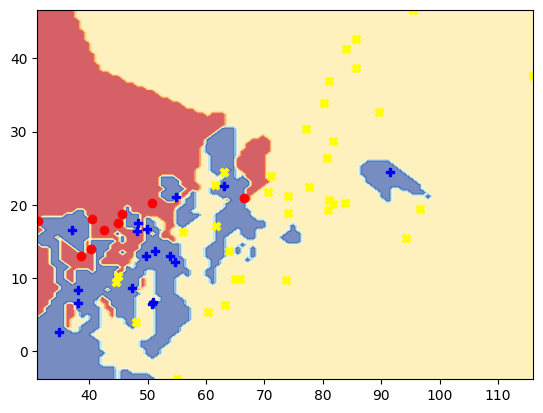

In [9]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

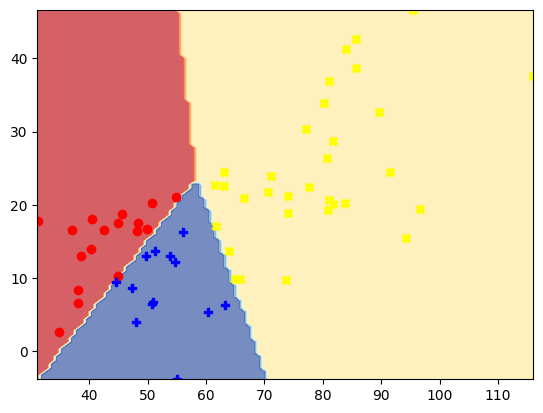

In [10]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting kmeans decision surface

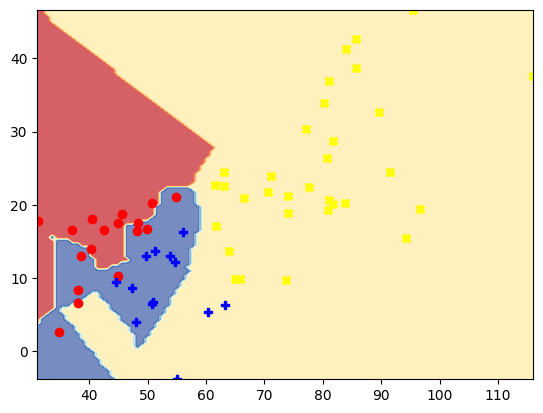

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()